### Audio Processing Examples

(88200,) 22050


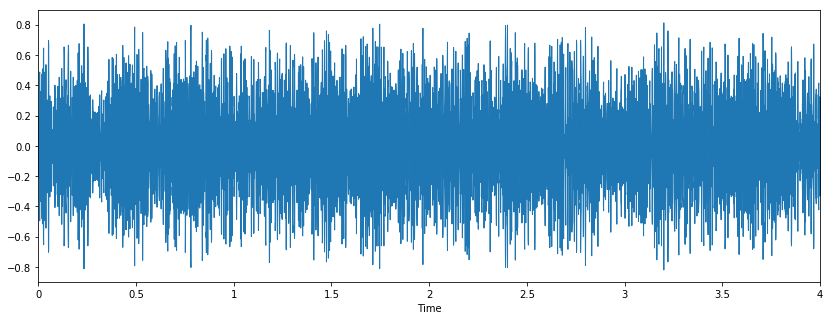

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import librosa
import librosa.display
import numpy as np

# TODO!!! Keep an audio file in Google Drive and access it from there
audio_path = Path('UrbanSound8K/audio/fold1/') 
audio_file = audio_path/'26270-9-0-35.wav'

x , sr = librosa.load(audio_file)
print(x.shape, sr)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

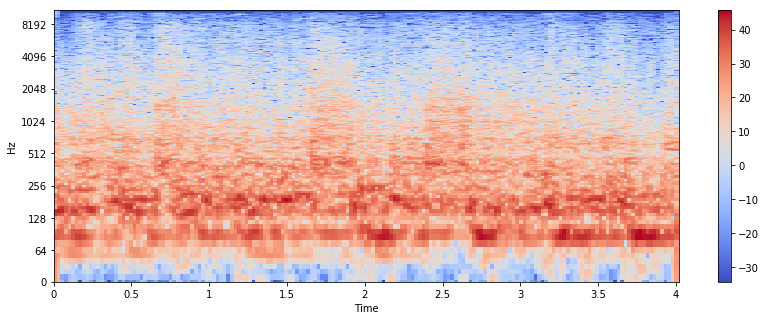

In [0]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [0]:
#----------------------------------------------------------------------------
# Simulate 7-second analog sound signal from dialing button keys on a telephone keypad
# The first 3 seconds is the dial key #1 sound, the next 2 seconds is the slience, 
# and the last 3 seconds i the dial key #2 sound.
#
# Every analog telephone button in dial pad generates 2 sine waves. For example, 
# pressing digit 1 button generates the sin waves at frequency 697Hz and 1209Hz. 
# The frequency 697Hz means that the sin wave repeats its fulle cycle 697 times 
# within a second. Two sin waves at two different frequencies mean that the 
# signal is sum of these two waves.
#
# Sampling rate of 4000, meaning that every second, 4000 sample points are taken. 
# This means that there are 28,000 sample points in total.
#----------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#-------------------------------
# Generate a sine wave of a given frequency and time duration for a sample rate
#-------------------------------
def get_signal_Hz(Hz,sample_rate,length_ts_sec):
    ## 1 sec length time series with sampling rate
    # [0, v1, v2, .... vn] ie. length is number of samples in one sec
    # So the elements in the list corresponds to each sample time
    # Not sure exactly what the v1, v2 values mean but they are based on the
    # frequency and probably correspond to the amplitude of the wave at that
    # point in time, after the sine is generated below
    ts1sec = list(np.linspace(0,np.pi*2*Hz,sample_rate))

    ## 1 sec length time series with sampling rate
    # The list gets duplicated "number of seconds" times 
    # eg. for 3 seconds we get [0, v1, v2, .. vn, 0, v1, v2, ... vn, 0, v1, v2, ...vn]
    ts = ts1sec*length_ts_sec

    # Get the sine of each sample to generate a sine wave
    return(list(np.sin(ts)))

sample_rate   = 4000
length_ts_sec = 3
## --------------------------------- ##
## 3 seconds of "digit 1" sound. Pressing digit 1 buttom generates sine waves at 
# frequency 697Hz and 1209Hz, which are summed together
## --------------------------------- ##
ts1  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec)) 
ts1 += np.array(get_signal_Hz(1209,sample_rate,length_ts_sec))
ts1  = list(ts1)

## -------------------- ##
## 2 seconds of silence
## [0, 0, 0, .....0] ie. length is number of samples
## -------------------- ##
ts_silence = [0]*sample_rate*1

## --------------------------------- ##
## 3 seconds of "digit 2" sound. Pressing digit 2 buttom generates sine waves at 
# frequency 697Hz and 1336Hz, which are summed together
## --------------------------------- ##
ts2  = np.array(get_signal_Hz(697, sample_rate,length_ts_sec)) 
ts2 += np.array(get_signal_Hz(1336,sample_rate,length_ts_sec))
ts2  = list(ts2)

## -------------------- ##
## Add up to 7 seconds
## ------------------- ##
ts = ts1 + ts_silence  + ts2

# Listen to the sound
from IPython.display import Audio
Audio(ts, rate=sample_rate)

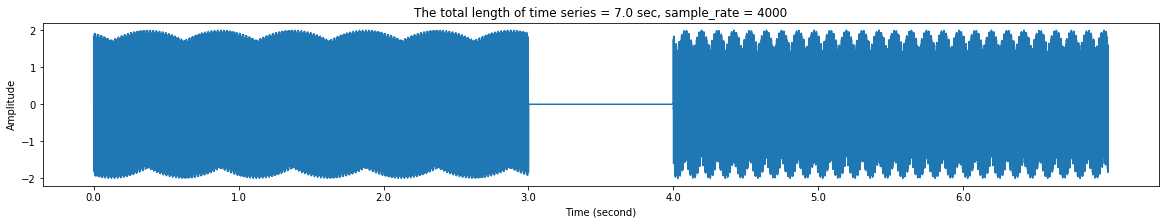

In [0]:
#-------------------------------
# Generate a sine wave of a given frequency and time duration for a sample rate
# Plot the sound signal in time domain ie. time on X-axis and amplitude on Y-axis
# The plot shows the magnitude of the sounds from amplitudes. However, this time 
# representation of the signal hides frequency infomation, meaning that you cannot 
# tell which frequency waves create this noise pattern.
#-------------------------------
def plot_signal_amplitude (sig, sample_rate):
  total_sig_sec = len(sig)/sample_rate
  plt.figure(figsize=(20,3))
  plt.plot(sig)
  plt.xticks(np.arange(0,len(sig),sample_rate),
            np.arange(0,total_sig_sec,1))
  plt.ylabel("Amplitude")
  plt.xlabel("Time (second)")
  plt.title("The total length of time series = {} sec, sample_rate = {}".format(total_sig_sec, sample_rate))
  plt.show()
  
plot_signal_amplitude (ts, sample_rate)

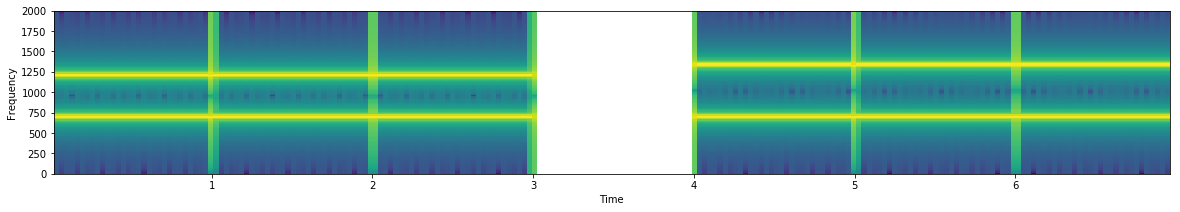

In [0]:
#-------------------------------
# Plot the Spectrogram. The first 3 seconds contains 697Hz and 1209Hz frequencies, 
# followed by 2 seconds of slience and then the last 3 seconds contains the 693Hz and 1336Hz waves
#-------------------------------
plt.figure(figsize=(20,3))

powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(ts, Fs=sample_rate)
plot.xlabel('Time')
plot.ylabel('Frequency')

plot.show()   

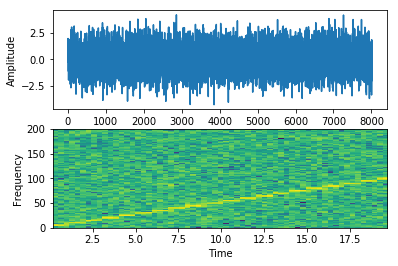

In [0]:
import matplotlib.pyplot as plot
import numpy as np

# Define the list of frequencies
frequencies = np.arange(5,105,5)

# Sampling Frequency
samplingFrequency   = 400

# Create two ndarrays for samples and signal
s1 = np.empty([0]) # For samples
s2 = np.empty([0]) # For signal

# Starting and stopping sample index
start = 1
stop = samplingFrequency+1

for frequency in frequencies:

    sub1 = np.arange(start, stop, 1)

    # Signal - Sine wave with varying frequency + Noise
    sub2 = np.sin(2*np.pi*sub1*frequency*1/samplingFrequency)+np.random.randn(len(sub1))

    s1      = np.append(s1, sub1)
    s2      = np.append(s2, sub2)

    start   = stop+1
    stop    = start+samplingFrequency

# Plot the signal
plot.subplot(211)
plot.plot(s1,s2)
plot.xlabel('Sample')
plot.ylabel('Amplitude')


# Plot the spectrogram
plot.subplot(212)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(s2, Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')

plot.show()   